In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist =  keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [5]:
class_names = ["0 T-shirt/top", 
               "1 Trouser", 
               "2 Pullover", 
               "3 Dress",
               "4 Coat", 
               "5 Sandal",
               "6 Shirt", 
               "7 Sneaker", 
               "8 Bag", 
               "9 Ankle boot"]

In [7]:
x_train_full = x_train_full.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))


In [19]:
x_train_n = x_train_full / 255.
x_test_n = x_test / 255.

In [21]:
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

In [22]:
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32 ,
                              kernel_size = (3,3) , 
                              strides = 1 ,
                              padding = 'valid',
                              activation="relu",
                              input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [26]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [35]:
model_history = model.fit(x_train,y_train,epochs=30,batch_size = 64,validation_data = (x_valid,y_valid))

Epoch 1/30
860/860 [==============================] - 23s 27ms/step - loss: 0.5948 - accuracy: 0.7791 - val_loss: 0.5840 - val_accuracy: 0.7902
Epoch 2/30
860/860 [==============================] - 25s 29ms/step - loss: 0.5902 - accuracy: 0.7808 - val_loss: 0.5719 - val_accuracy: 0.7928
Epoch 3/30
860/860 [==============================] - 25s 29ms/step - loss: 0.5864 - accuracy: 0.7823 - val_loss: 0.6215 - val_accuracy: 0.7596
Epoch 4/30
860/860 [==============================] - 24s 28ms/step - loss: 0.5821 - accuracy: 0.7854 - val_loss: 0.5708 - val_accuracy: 0.7956
Epoch 5/30
860/860 [==============================] - 21s 25ms/step - loss: 0.5788 - accuracy: 0.7873 - val_loss: 0.5604 - val_accuracy: 0.7992
Epoch 6/30
860/860 [==============================] - 21s 25ms/step - loss: 0.5745 - accuracy: 0.7883 - val_loss: 0.5593 - val_accuracy: 0.8010
Epoch 7/30
860/860 [==============================] - 22s 25ms/step - loss: 0.5715 - accuracy: 0.7897 - val_loss: 0.5531 - val_accuracy:

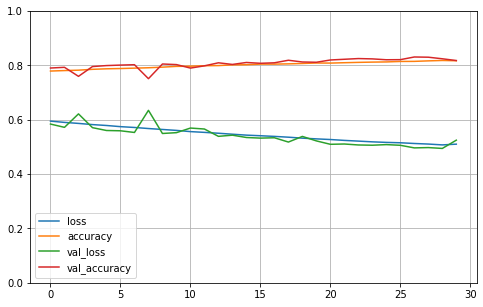

In [36]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
ev = model.evaluate(x_test_n,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.5582 - accuracy: 0.7973


In [38]:
ev

[0.5582469701766968, 0.7972999811172485]

In [39]:
x_new = x_test[:3]

In [40]:
y_pred = model.predict_classes(x_new)
y_pred

C:\Users\Joskar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [41]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


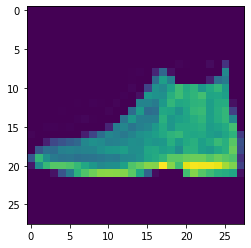

In [42]:
print(plt.imshow(x_test[0].reshape((28,28))))

In [43]:
 model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32 ,
                              kernel_size = (3,3) , 
                              strides = 1 ,
                              padding = 'valid',
                              activation="relu",
                              input_shape=(28,28,1)))
model_a.add(keras.layers.MaxPool2D(2,2))

model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300,activation="relu"))
model_a.add(keras.layers.Dense(100,activation="relu"))
model_a.add(keras.layers.Dense(10,activation="softmax"))

In [44]:
 model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32 ,
                              kernel_size = (3,3) , 
                              strides = 1 ,
                              padding = 'valid',
                              activation="relu",
                              input_shape=(28,28,1)))

model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300,activation="relu"))
model_b.add(keras.layers.Dense(100,activation="relu"))
model_b.add(keras.layers.Dense(10,activation="softmax"))

In [45]:
model_a.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [46]:
model_b.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [47]:
model_a.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
model_b.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [49]:
model_history_a = model_a.fit(x_train,
                              y_train, 
                              epochs = 30, 
                              batch_size = 64,
                              validation_data = (x_valid,y_valid))

Epoch 1/30
860/860 [==============================] - 24s 27ms/step - loss: 2.3020 - accuracy: 0.1105 - val_loss: 2.3019 - val_accuracy: 0.1548
Epoch 2/30
860/860 [==============================] - 26s 30ms/step - loss: 2.3018 - accuracy: 0.1170 - val_loss: 2.3017 - val_accuracy: 0.1254
Epoch 3/30
860/860 [==============================] - 21s 25ms/step - loss: 2.3015 - accuracy: 0.1135 - val_loss: 2.3018 - val_accuracy: 0.0914
Epoch 4/30
860/860 [==============================] - 19s 22ms/step - loss: 2.3013 - accuracy: 0.1220 - val_loss: 2.3008 - val_accuracy: 0.1206
Epoch 5/30
860/860 [==============================] - 18s 20ms/step - loss: 2.3009 - accuracy: 0.1155 - val_loss: 2.3009 - val_accuracy: 0.0986
Epoch 6/30
860/860 [==============================] - 17s 20ms/step - loss: 2.3005 - accuracy: 0.1255 - val_loss: 2.3002 - val_accuracy: 0.0980
Epoch 7/30
860/860 [==============================] - 15s 18ms/step - loss: 2.3000 - accuracy: 0.1209 - val_loss: 2.2996 - val_accuracy:

In [50]:
model_history_b = model_b.fit(x_train,
                              y_train, 
                              epochs = 30, 
                              batch_size = 64,
                              validation_data = (x_valid,y_valid))

Epoch 1/30
860/860 [==============================] - 29s 32ms/step - loss: 2.3019 - accuracy: 0.1108 - val_loss: 2.3018 - val_accuracy: 0.1116
Epoch 2/30
860/860 [==============================] - 25s 29ms/step - loss: 2.3015 - accuracy: 0.1153 - val_loss: 2.3013 - val_accuracy: 0.0914
Epoch 3/30
860/860 [==============================] - 22s 26ms/step - loss: 2.3010 - accuracy: 0.1201 - val_loss: 2.3010 - val_accuracy: 0.0914
Epoch 4/30
860/860 [==============================] - 22s 26ms/step - loss: 2.3002 - accuracy: 0.1267 - val_loss: 2.2991 - val_accuracy: 0.2132
Epoch 5/30
860/860 [==============================] - 22s 26ms/step - loss: 2.2992 - accuracy: 0.1394 - val_loss: 2.2984 - val_accuracy: 0.0986
Epoch 6/30
860/860 [==============================] - 22s 26ms/step - loss: 2.2976 - accuracy: 0.1382 - val_loss: 2.2962 - val_accuracy: 0.1394
Epoch 7/30
860/860 [==============================] - 22s 26ms/step - loss: 2.2953 - accuracy: 0.1486 - val_loss: 2.2935 - val_accuracy: